<a href="https://colab.research.google.com/github/antoinexp/markov-chains-COM-516/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is provided as a starting point to help you generate random instances G1 and G2 as mentioned in the handout.

You are free to use and modify it at your own convenience.

---



In [2]:
import scipy.stats as st
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
class DatasetGenerator(object):
    def __init__(self, N=100):
        self.N = N
        self.x = None
        self.v = None
        self.refresh()

    def refresh(self):
        raise Exception("undefined")

In [4]:
class G1(DatasetGenerator):
    def refresh(self):
        self.x = st.uniform().rvs((self.N,2))
        self.v = st.uniform().rvs((self.N,))

In [5]:
class G2(DatasetGenerator):
    def refresh(self):
        self.x = st.uniform().rvs((self.N,2))
        self.v = np.exp(st.norm(-0.85, 1.3).rvs((self.N,)))

### Uniform distribution ($\mathcal U([0,1])$)

In [6]:
g1 = G1(1000)

Examples:

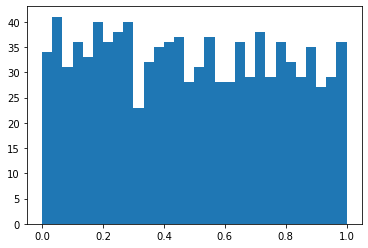

numpy.ndarray

In [7]:
# Plot a histogram of the v array
plt.hist(g1.v, bins=30)
plt.show()
type(g1.v)

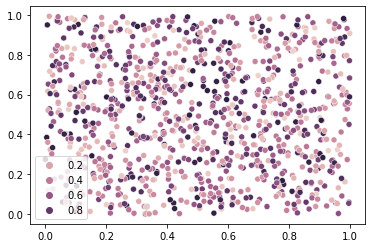

In [8]:
# plot the position of the points
# plt.figure(figsize=(5,5))
sns.scatterplot(g1.x[:,0], g1.x[:,1], hue=g1.v)
plt.show()

You can refresh the dataset

In [9]:
g1.refresh() # generate a new dataset

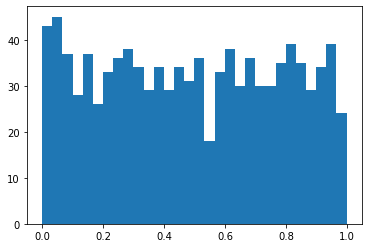

In [10]:
plt.hist(g1.v, bins=30)
plt.show()

Or for instance, you can generate 10 instances and compute the average position of all the points:

In [11]:
m = np.array([0., 0.])

for _ in range(10):
  g1.refresh() # refresh the dataset
  m  += 0.1*g1.x.mean()

print(m)

[0.49994798 0.49994798]


### Test on log-normal distribution

In [12]:
g2 = G2()

Example:

you can use g2 to generate an instance of the lognormal distribution

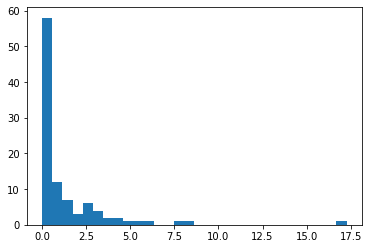

In [13]:
plt.hist(g2.v, bins=30)
plt.show()

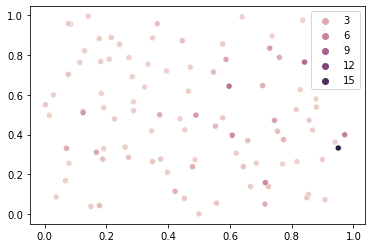

In [14]:
# plot the position of the points
# plt.figure(figsize=(5,5))
sns.scatterplot(g2.x[:,0], g2.x[:,1], hue=g2.v)
plt.show()

In [15]:
g2.refresh() # to generate a new x and v

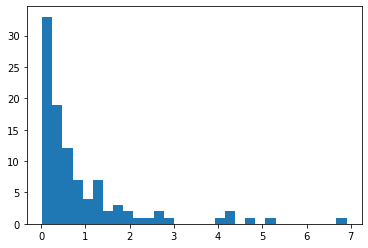

In [16]:
plt.hist(g2.v, bins=30)
plt.show()

---

### Metropolis Hastings

In [17]:
# fill-in this section with your code

from SimulatedAnnealingbis import SimulatedAnnealing
import SimulatedAnnealing as sim_an

In [18]:
print(g1.x.shape)

(1000, 2)


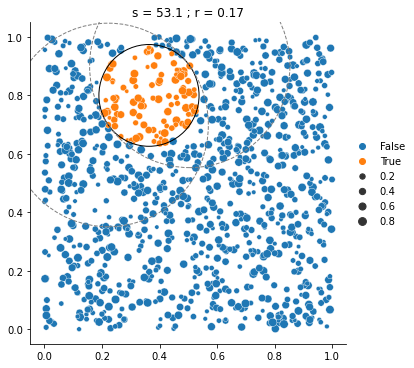

  1%|          | 6/1000 [00:00<00:16, 59.08it/s]0.057711549575098955
53.09589556215263
100%|██████████| 1000/1000 [00:15<00:00, 63.00it/s]


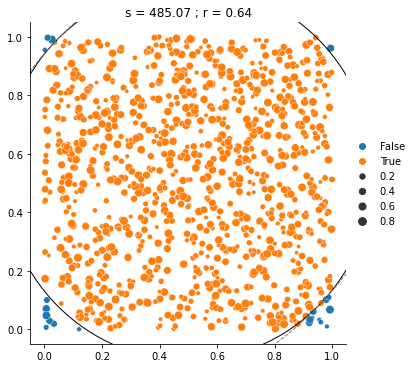

485.0656634882439


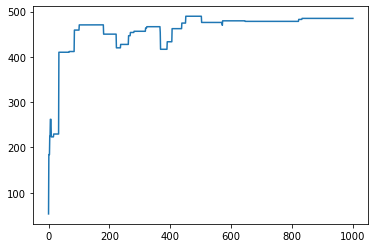

In [24]:
iterations = 1000
SA = SimulatedAnnealing(0, g1,0.2)
print(SA.S.get_objective())
SA.cool_down(iterations)
print(SA.S.get_objective())
plt.plot(range(iterations+1), SA.objectives)
plt.show()

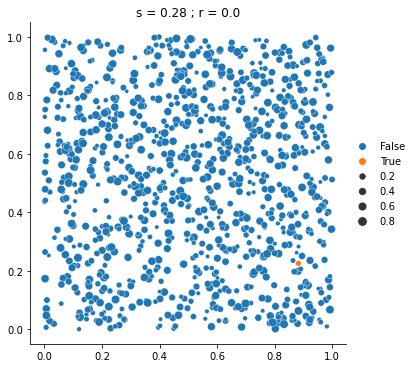

 10%|█         | 105/1000 [00:00<00:00, 1040.40it/s]5.75105691558519
0.27985080587058164
100%|██████████| 1000/1000 [00:06<00:00, 147.96it/s]


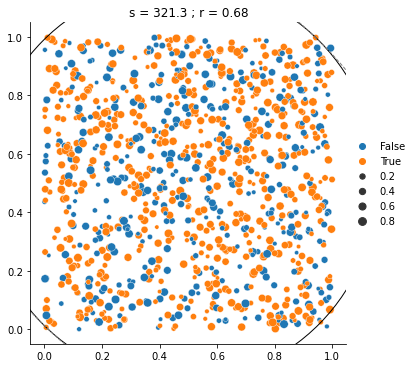

321.3004028555776


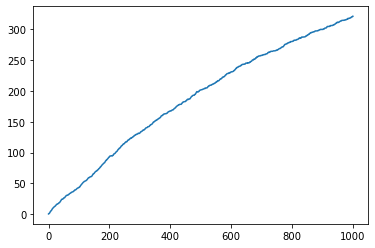

In [20]:
SA = sim_an.SimulatedAnnealing(0, g1,0.2)
print(SA.S.get_objective())
SA.cool_down(1000)
print(SA.S.get_objective())
plt.plot(range(1001), SA.objectives)
plt.show()
